# Data Visualization

Our project is predominantly based on data mining of the real estate portal (Sreality) in the Czech Republic. The majority of the data gathered is going to be used in passion project of ours. However, the brief visualization can be found in this part of the project. The visualization is going to be divided in two parts - first: description of the width of real estate marktet and second, description of prices.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("/Users/Michael/Desktop/sreality_output_13052019.csv")

In [9]:
data.head(1)

,index,aukce,cena_aukce,lokalita,cena,cena_czk_value,cena_czk_unit,cena_czk_name,name,lat,...,typ_inzeratu,kategorie,podkategorie,s_userid,s_mobile,s_active,s_web,s_name,s_email,image
0,1000096092,False,0.0,"ulice Tyršova, Děčín - část obce Děčín I-Děčín",1,1,NaN,Celková cena,Prodej obchodního prostoru 1 383 m²,50.780903,...,prodej,komercni,obchodni prostory,82274.0,602974442.0,True,https://www.remaxeso.cz/,RE/MAX Eso,katerina.kotyzova@re-max.cz,https://d18-a.sdn.szn.cz/d_18/c_img_E_BI/v3qqX...


In [10]:
# We are going to see what data looks like
data.describe()

,index,cena_aukce,cena,cena_czk_value,lat,lon,hash,price_whole,price_recalculated,s_userid,s_mobile
count,5.976900e+04,5.976900e+04,5.976900e+04,5.976900e+04,59769.000000,59769.000000,5.976900e+04,5.408800e+04,1.845400e+04,59009.000000,5.899900e+04
mean,2.151101e+09,1.119390e+04,2.950667e+06,2.950667e+06,49.866166,15.343500,2.151101e+09,8.812985e+06,9.510605e+03,55635.180227,6.740549e+08
std,1.242095e+09,4.115669e+05,2.067613e+07,2.067613e+07,0.467330,1.555420,1.242095e+09,1.249993e+09,3.387385e+05,30932.923970,1.566348e+08
min,3.644400e+04,0.000000e+00,1.000000e+00,1.000000e+00,48.615200,12.163219,3.644400e+04,1.000000e+00,1.000000e+00,266.000000,1.702400e+04
25%,1.076727e+09,0.000000e+00,1.700000e+04,1.700000e+04,49.576118,14.371387,1.076727e+09,3.740000e+04,1.470000e+02,21098.000000,6.043418e+08
50%,2.152374e+09,0.000000e+00,1.070000e+06,1.070000e+06,49.997047,14.620621,2.152374e+09,1.485000e+06,3.854750e+02,66570.000000,7.329097e+08
75%,3.230421e+09,0.000000e+00,3.630000e+06,3.630000e+06,50.110455,16.610714,3.230421e+09,3.960000e+06,1.563750e+03,83705.000000,7.772247e+08
max,4.294819e+09,4.860400e+07,3.317330e+09,3.317330e+09,51.025295,18.833136,4.294819e+09,2.903713e+11,3.001533e+07,92777.000000,9.727419e+08


In [11]:
# let's see columns:
data.columns

Index(['index', 'aukce', 'cena_aukce', 'lokalita', 'cena', 'cena_czk_value',
       'cena_czk_unit', 'cena_czk_name', 'name', 'lat', 'lon', 'hash',
       'urlSreality', 'linkdetail', 'download_date', 'description', 'geometry',
       'locality_typ', 'locality_value', 'text', 'price_whole', 'price_freq',
       'price_recalculated', 'price_recalculated_perunit', 'typ_inzeratu',
       'kategorie', 'podkategorie', 's_userid', 's_mobile', 's_active',
       's_web', 's_name', 's_email', 'image'],
      dtype='object')

In [12]:
# we explored ambigious variables:
data.count()

index                         59769
aukce                         59769
cena_aukce                    59769
lokalita                      59769
cena                          59769
cena_czk_value                59769
cena_czk_unit                 18759
cena_czk_name                 59769
name                          59611
lat                           59769
lon                           59769
hash                          59769
urlSreality                   59769
linkdetail                    59769
download_date                 59769
description                   59611
geometry                      59606
locality_typ                  59611
locality_value                59611
text                          59611
price_whole                   54088
price_freq                    16804
price_recalculated            18454
price_recalculated_perunit    18454
typ_inzeratu                  59611
kategorie                     59611
podkategorie                  59611
s_userid                    

In [13]:
data.groupby("cena_czk_name").size() #ok

cena_czk_name
Celková cena    59769
dtype: int64

In [14]:
data.groupby("cena_czk_unit").size() # 18759 "za měsíc" or NaN

cena_czk_unit
za měsíc    18759
dtype: int64

In [15]:
# We drop na for data where cathegory is missing, since this is a core variable for visualisation and it is only ~0.2% of data.
data_clean = data.dropna(subset=['kategorie', 'podkategorie'])

In [16]:
# Let's see cathegories for future visualization
data_clean.groupby("podkategorie").size()

podkategorie
1+1                     1507
1+kk                    2559
2+1                     3704
2+kk                    5201
3+1                     3994
3+kk                    3596
4+1                      807
4+kk                    1236
5+1                      133
5+kk                     219
6 a vice                  89
atypicky                 108
bydleni                 5233
chalupa                  683
chata                   1409
cinzovni dum             493
garaz                    446
garazove stani           216
kancelare               4282
komercni                 658
lesy                     376
louky                    363
mobilheim                  7
na klic                  319
obchodni prostory       3038
ostatni                 1397
pamatka/jine              66
pole                    1076
pudni prostor              8
restaurace               650
rodinny                10787
rybniky                   20
sady/vinice               31
sklady                  2016
u

## 1) Visualition - description of the Czech Real Estate market (proxied by Sreality)

Text(0.5, 0, 'type')

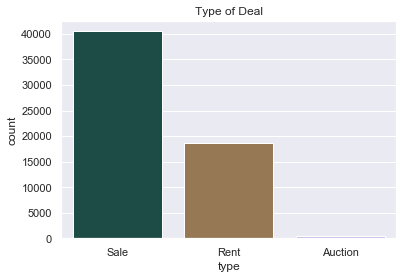

In [236]:
sns.set(style="darkgrid")
ax = sns.countplot(x="typ_inzeratu",palette="cubehelix", data=data_clean)

ax.set_title("Type of Deal")
ax.set(xticklabels=["Sale", "Rent", "Auction"])

plt.xlabel('type')

#plt.yticks()
#plt.legend('d', ncol=2, loc='upper right');

From the chart, we can see that the most listing are in form of sale ("prodej").Afterwards, rent ("pronajem") which is only approximately half of the sale deals. Furthermore, auction ("drazby") deals are only small negliable fraction of the Sreality web.

Text(0.5, 0, 'cathegory')

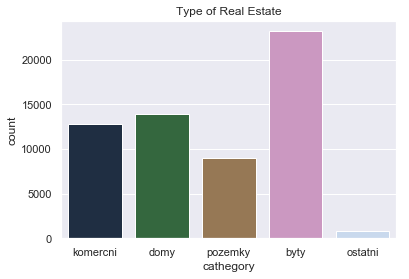

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="kategorie",palette="cubehelix", data=data_clean)
ax.set_title("Type of Real Estate")
plt.xlabel('cathegory')

From the type of Real Estate side, we can clearly see, that cathegory flats ("byty") is the largest. Then Sreality web sells Houses ("domy"). It is interesting, that after flats, the houses ("domy), commercial RE ("komercni") and land ("pozemky") are very large cathegories. Let's look on the distribution of renting and selling of these Real Estate types, to get additional information about the market.

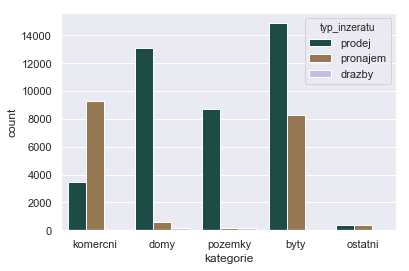

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="kategorie",palette="cubehelix", data=data_clean, hue="typ_inzeratu")

From the more detailed chart, we can see that commercial RE is mostly listed as a rental - which is common business practice (for example for offices). On the other hand, lands and houses are rarely rented, mostly only for sale. This confirms economical rationality of the market as these two cathegories can be rarely economically justified in case of renting. 

Moreover, we can see that majority of flats are for sale, which is interesting fact - we expected the ratios to be inverse, as the rents are rapidly increasing, however the prices increased as well and sellers may want to utilize a good economical conditions to sell their flats. Maybe, because the sellers are thinking that the economy is at its peek and the prices will go down. It would be interesting to see the ratio of sale/rent for flats (as flats are commonly being sold as well as rented) in the time-series data. It could be a good indicator of the market mood.

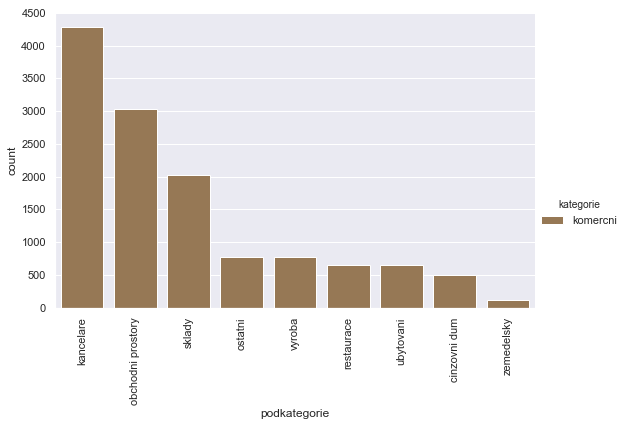

In [238]:
data_tmp = data_clean[data_clean.kategorie=="komercni"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index, 
                  hue="kategorie")

g.set_xticklabels(rotation=90)

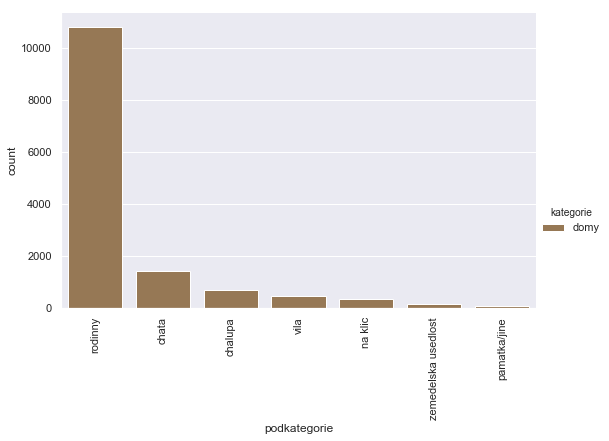

In [86]:
data_tmp = data_clean[data_clean.kategorie=="domy"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index, 
                  hue="kategorie")

g.set_xticklabels(rotation=90)

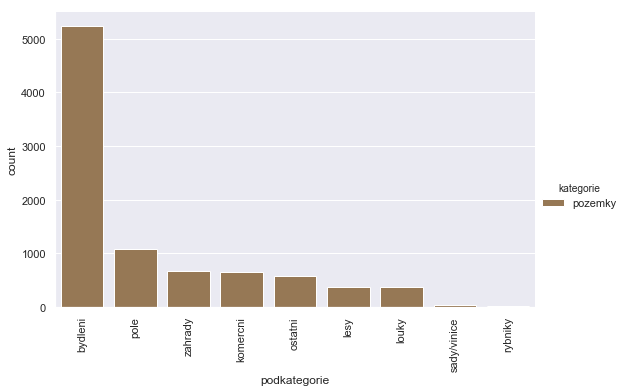

In [87]:
data_tmp = data_clean[data_clean.kategorie=="pozemky"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index, 
                  hue="kategorie")

g.set_xticklabels(rotation=90)

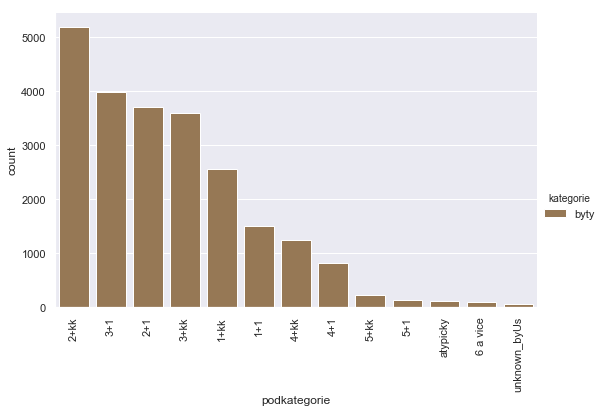

In [88]:
data_tmp = data_clean[data_clean.kategorie=="byty"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index, 
                  hue="kategorie")

g.set_xticklabels(rotation=90)

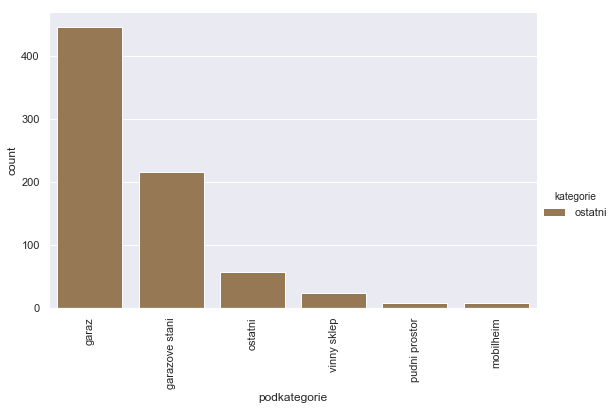

In [89]:
data_tmp = data_clean[data_clean.kategorie=="ostatni"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index, 
                  hue="kategorie")

g.set_xticklabels(rotation=90)

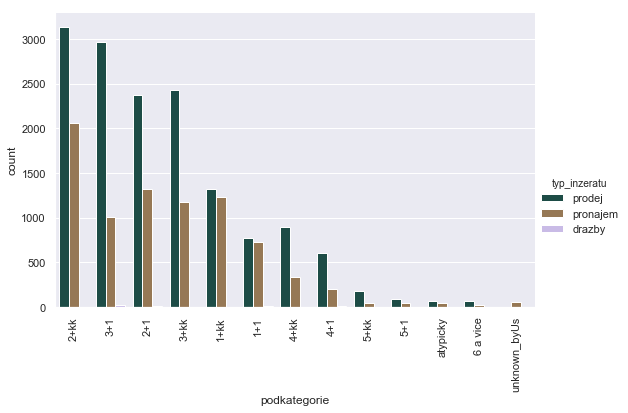

In [90]:
data_tmp = data_clean[data_clean.kategorie=="byty"]

g = sns.factorplot("podkategorie",palette="cubehelix", data=data_tmp, 
                   aspect=1.5, kind="count", color="b",
                  order = data_tmp['podkategorie'].value_counts().index, 
                  hue="typ_inzeratu")

g.set_xticklabels(rotation=90)

Some prices are weird (i.e. 1CZK). We believe its dohodou... 


In [91]:
data_clean["flag_1CZK"] = data_clean.cena == 1

/Users/Michael/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
#number of 1CZK listing
sum(data_clean.flag_1CZK == 1)

5524

In [93]:
#number of 1czk by prodej and pronajem
data_clean[["typ_inzeratu", "flag_1CZK", "cena"]].groupby([ "typ_inzeratu", "flag_1CZK"]).count()

cena
typ_inzeratu flag_1CZK       
drazby       False        374
prodej       False      36908
             True        3635
pronajem     False      16805
             True        1889

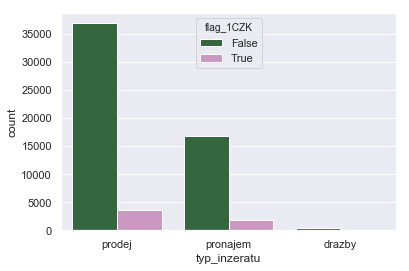

In [94]:
sns.set(style="darkgrid")
ax = sns.countplot(x="typ_inzeratu",palette="cubehelix", data=data_clean, hue="flag_1CZK")

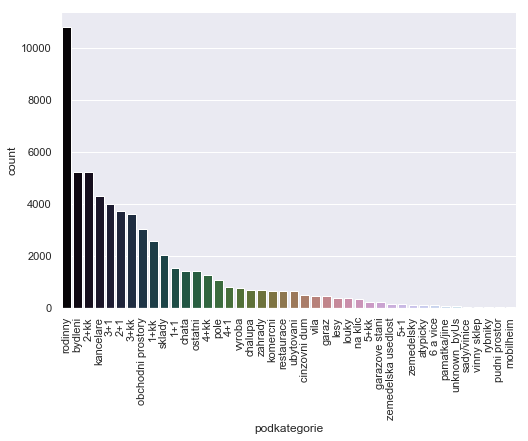

In [95]:
# frequent real estate agency
g = sns.factorplot("podkategorie",palette="cubehelix", data=data_clean, 
                   aspect=1.5, kind="count", color="b",
                  order = data_clean['podkategorie'].value_counts().index)
g.set_xticklabels(rotation=90)

In [96]:
# frequent real estate agency
#select top 10 agencies
d = data_clean.groupby("s_name").count()["index"].sort_values(ascending=False)[0:20]

In [97]:
dd = pd.DataFrame(d)
proc = pd.DataFrame(d/data_clean.s_name.count()*100)

In [98]:
dd.head()

,index
s_name,
M&M reality,6622
Bidli,1208
"Realitní kancelář STING, s.r.o.",897
NEXT REALITY,706
OK Realitní služby,680


In [66]:
proc.head()

,index
s_name,
M&M reality,11.222017
Bidli,2.047145
"Realitní kancelář STING, s.r.o.",1.520107
NEXT REALITY,1.196428
OK Realitní služby,1.152367


In [29]:
data_clean_sub = data_clean[data_clean.s_name.isin(dd.index)]

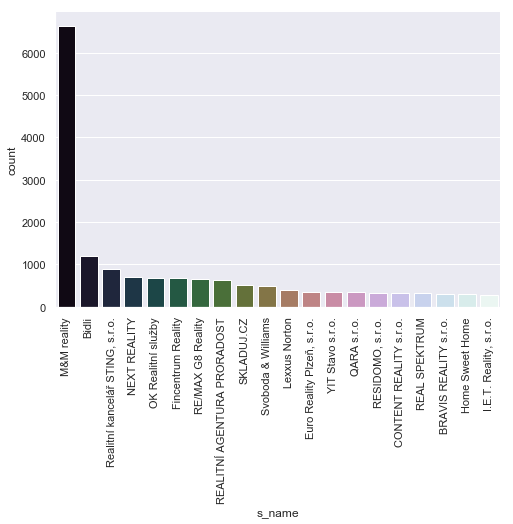

In [49]:
# frequent real estate agency
g = sns.factorplot("s_name",palette="cubehelix", data=data_clean_sub, 
                   aspect=1.5, kind="count", color="b",
                  order = data_clean_sub['s_name'].value_counts().index)

g.set_xticklabels(rotation=90)

M&M reality is the biggest listing entity on the Sreality web, which is not suprising since M&M reality is the biggest real estate agency in the Czech Republic. However the gap between the M&M and rest is suprisingly big - the M&M has more than 6,600 listings (11.2% share), the second bigest agency has only 1,200 with 2% market share.

## 2) Visualition - prices in the Czech Real Estate market (proxied by Sreality)

In [99]:
data_clean[["typ_inzeratu","aukce"]].groupby("aukce").count()

,typ_inzeratu
aukce,
False,59237
True,374


In [100]:
#drop auction due to their unrealistic values
noaukce = data_clean[data.aukce == 0]

/Users/Michael/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Drop weird prices (i.e. price 1czk and also drop extremely large values (they imply misleading histograms... we will use data up to 99 percentile of price))

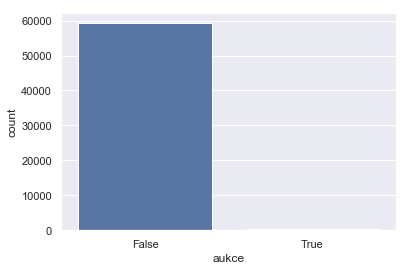

In [32]:
sns.set(style="darkgrid")
ax = sns.countplot(x="aukce", data=data_clean)

### select non-auction data and price that is not dohodou

In [ ]:
je tam par bizar hodnot tak at je to citelne


In [104]:
noaukce_data_tmp = noaukce[noaukce.cena < np.percentile(noaukce.cena, 99)]

noaukce_data_clean = noaukce_data_tmp[noaukce_data_tmp.cena > 1]

In [105]:
noaukce_data_clean.cena.describe()

count    5.312000e+04
mean     2.704766e+06
std      3.634596e+06
min      2.500000e+01
25%      3.500000e+04
50%      1.450000e+06
75%      3.890000e+06
max      2.393864e+07
Name: cena, dtype: float64

In [107]:
#convert price to thousands
noaukce_data_clean.cena = noaukce_data_clean.cena / 1000

/Users/Michael/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


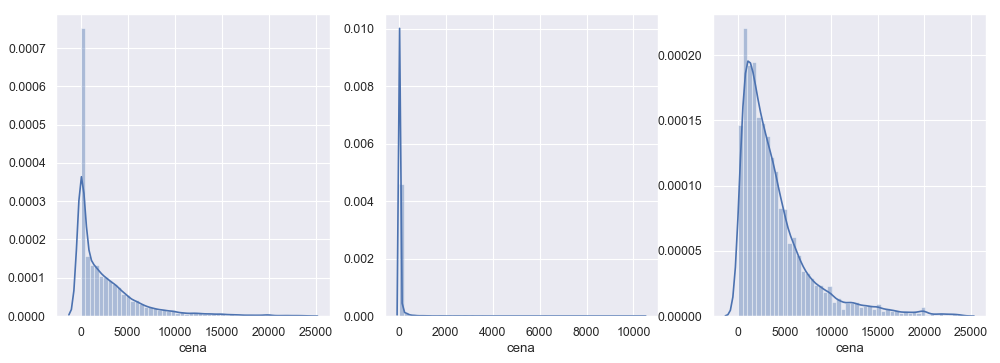

In [241]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
#distibution of prices (both rent and sell)
sns.distplot(noaukce_data_clean.cena)


plt.subplot(1, 3, 2)
#distribution of prices - rent
tmp_rent = noaukce_data_clean[noaukce_data_clean.typ_inzeratu == "pronajem"]
sns.distplot(tmp_rent.cena)

plt.subplot(1, 3, 3)
#distribution of prices - rent
tmp_sell = noaukce_data_clean[noaukce_data_clean.typ_inzeratu == "prodej"]
sns.distplot(tmp_sell.cena)

In [113]:
tmp_rent.cena.describe()

count    16803.000000
mean        46.005096
std        167.308321
min          0.084000
25%          9.000000
50%         15.000000
75%         30.000000
max      10452.041000
Name: cena, dtype: float64

### boxplos


In [124]:
noaukce_data_clean_sale = noaukce_data_clean[noaukce_data_clean.typ_inzeratu == "prodej"]

In [ ]:
# rent values might still be unrealistically high (either they are outliers nebo proste jen vysoke hodnoty)

In [127]:
noaukce_data_clean_rent = noaukce_data_clean[noaukce_data_clean.typ_inzeratu == "pronajem"]

In [226]:
#noaukce_data_clean_rent = noaukce_data_clean_rent[noaukce_data_clean_rent.cena < np.percentile(noaukce_data_clean_rent.cena, 99)]

In [244]:
#sorting ids for following boxplots
sortid_noaukce_data_clean_sale = noaukce_data_clean_sale.groupby("kategorie").median()["cena"].sort_values().index

sortid_noaukce_data_clean_rent = noaukce_data_clean_rent.groupby("kategorie").median()["cena"].sort_values().index

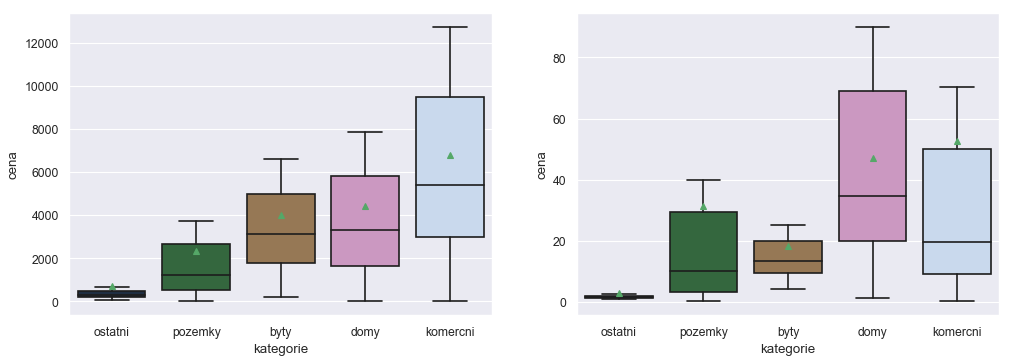

In [246]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
sns.boxplot(x="kategorie", y="cena", data=noaukce_data_clean_sale, showfliers=False, whis=0.5,
            showmeans=True,palette="cubehelix", order = sortid_noaukce_data_clean_sale)


plt.subplot(1, 2, 2)
sns.boxplot(x="kategorie", y="cena", data=noaukce_data_clean_rent, showfliers=False, whis=0.5,
            showmeans=True,palette="cubehelix", order = sortid_noaukce_data_clean_sale)


In [228]:
sort_id_byty_sale = noaukce_data_clean_sale[noaukce_data_clean_sale.kategorie=="byty"].groupby("podkategorie").median()["cena"].sort_values().index

In [229]:
sort_id_byty_rent = noaukce_data_clean_rent[noaukce_data_clean_rent.kategorie=="byty"].groupby("podkategorie").median()["cena"].sort_values().index

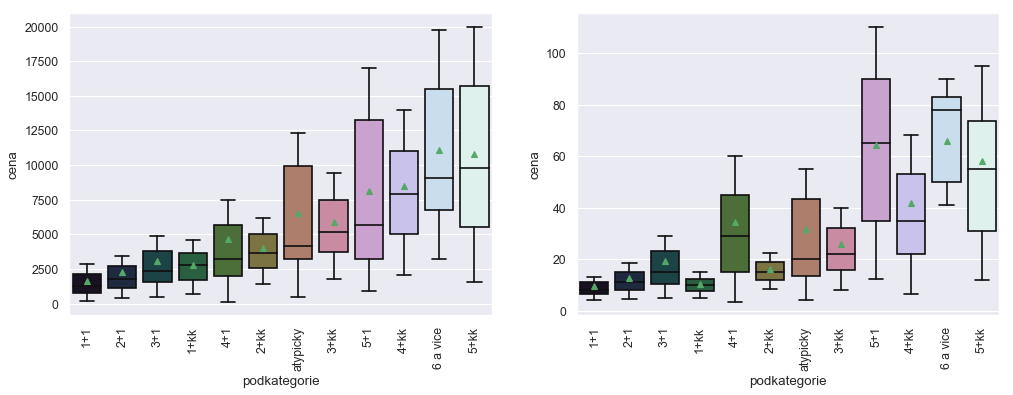

In [247]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
ax = sns.boxplot(x="podkategorie", y="cena", data=noaukce_data_clean_sale[noaukce_data_clean_sale.kategorie=="byty"], 
                 showfliers=False, whis=0.5,showmeans=True,palette="cubehelix",
                order = sort_id_byty_sale)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x="podkategorie", y="cena", data=noaukce_data_clean_rent[noaukce_data_clean_rent.kategorie=="byty"],
                  showfliers=False, whis=0.5,showmeans=True,palette="cubehelix",
                 order = sort_id_byty_sale)
e=ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

In [231]:
# take top 20 real estate agencies

data_clean_sub = data_clean[data_clean.s_name.isin(dd.index)]

In [232]:
noaukce_data_clean_sale_top20 = noaukce_data_clean_sale[noaukce_data_clean_sale.s_name.isin(dd.index)] 

#get only byty
noaukce_data_clean_sale_top20 = noaukce_data_clean_sale_top20[noaukce_data_clean_sale_top20.kategorie=="byty"]

In [233]:
noaukce_data_clean_rent_top20 = noaukce_data_clean_rent[noaukce_data_clean_rent.s_name.isin(dd.index)]

#get only byty
noaukce_data_clean_rent_top20 = noaukce_data_clean_rent_top20[noaukce_data_clean_rent_top20.kategorie=="byty"]

In [234]:
#sort them by median
sort_id_realitka_sale = noaukce_data_clean_sale_top20.groupby("s_name").mean()["cena"].sort_values().index

sort_id_realitka_rent = noaukce_data_clean_rent_top20.groupby("s_name").mean()["cena"].sort_values().index

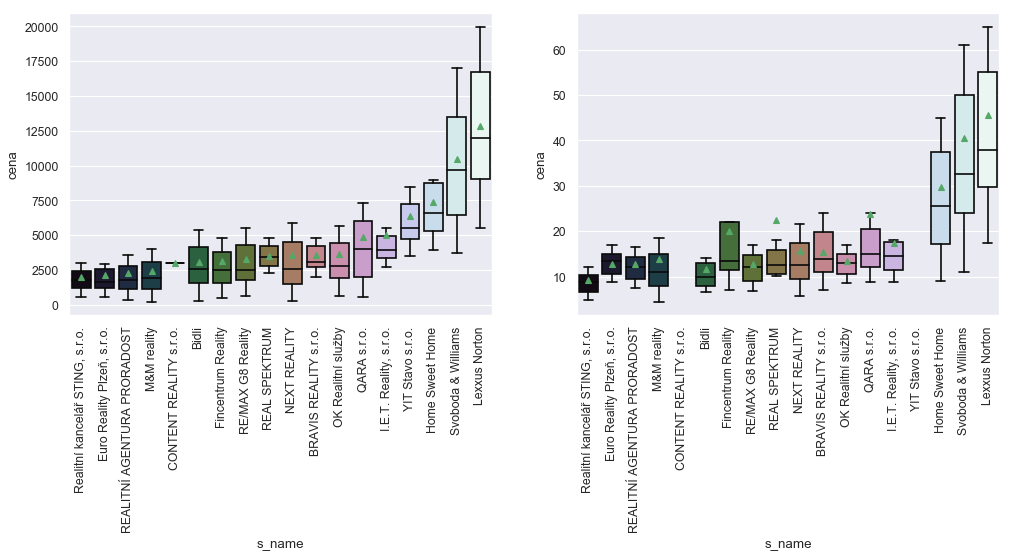

In [248]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
ax = sns.boxplot(x="s_name", y="cena", data=noaukce_data_clean_sale_top20, 
                 showfliers=False, whis=0.5,showmeans=True,palette="cubehelix",
                order = sort_id_realitka_sale)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x="s_name", y="cena", data=noaukce_data_clean_rent_top20,
                  showfliers=False, whis=0.5,showmeans=True,palette="cubehelix",
                 order = sort_id_realitka_sale)
e=ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

## Chci - 2 grafy -> histogram s cenama. + vedle cummulative graf


In [ ]:


x = noaukce_data_clean.cena

plt.hist(x, bins=10, facecolor='pink', alpha=1)
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('Distribution of Real Estate Prices')
plt.show()

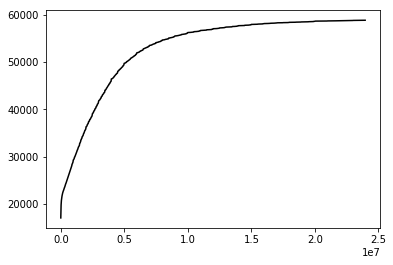

In [405]:
values, base = np.histogram(x, bins=1000)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='black')
plt.show()

In [525]:
data_clean.groupby("s_name").size()

s_name
"Agentura REPRE"                                 4
1. Chodská realitní kancelář v.o.s.             22
1. Nonstop Reality                              35
1. Real - Invest, s.r.o.                         6
1. Slezská realitní, s.r.o.                      2
1. Staroměstská realitní                         2
1. Zbraslavská realitní kancelář                10
1. opavská realitka, s.r.o.                     44
100 DIRECT s.r.o.                                7
108 AGENCY, s.r.o.                               2
1JMREALITY - Jan Maroušek                        7
3D Organization, s.r.o.                          4
3E PROJEKT, a.s.                                 5
3K Capital, s.r.o.                               1
3KB7 CZ, s.r.o.                                  3
4 DEVELOP                                       13
7k-REALITY, s.r.o.                               2
7team investment s.r.o.                          1
A - Trading, a.s.                                9
A V A L S T A V, s.r.o. 

In [129]:
#data_XXX = data_clean([,["typ_inzeratu","cena"]])
#data_XXX
#sns.pairplot(data_clean,hue='typ_inzeratu', size=2.5)


SyntaxError: invalid syntax (<ipython-input-129-03195c636bd3>, line 1)